In [203]:
import csv
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [204]:
data_dir = "."
def get_files(file_re):
    files = []
    for filename in os.listdir(data_dir):
        print(filename)

def get_csv_data(filename):
    data = []
    with open(filename, 'r') as f:
        b = csv.reader(f)
        next(b)
        for row in b:
            data.append(row)
    return data

In [205]:
data = get_csv_data("complied_all_data.csv")


In [206]:
src = 'knu'
dest = 'blr'

In [207]:
def filter_data(src_, dest_):
    new = []
    for row in data:
        if row[0] == src_ and row[1]==dest_:
            new.append(row)
    return new

In [208]:
filt_data = filter_data(src, dest)

In [209]:
filt_data

[['knu', 'blr', '2024-07-12', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-13', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-14', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-15', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-16', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-17', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-18', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-19', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-20', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-21', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-22', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-23', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-24', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-25', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-26', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-27', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-28', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-29', '2024-09-12', '5798'],
 ['knu', 'blr', '2024-07-30', '2024-09-12', '5

In [210]:
def calc_avg_on_travel_date(data):
    sum = [0]*7
    cnt = [0]*7
    delta = 90 
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = trav_date.weekday()
            sum[ind] += int(row[4])
            cnt[ind] += 1
    
    avg = [0]*7
    for i in range(7):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    return avg


In [211]:
def calc_avg_on_booking_date(data):
    sum = [0]*7
    cnt = [0]*7
    delta = 90 
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = book_date.weekday()
            sum[ind] += int(row[4])
            cnt[ind] += 1
    
    avg = [0]*7
    for i in range(7):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    return avg

In [212]:
avg_on_travel_date = calc_avg_on_travel_date(filt_data)
avg_on_travel_date

No data for  1
No data for  2
No data for  4
No data for  6


[8723.815324165029, 0, 0, 7869.94495412844, 0, 8615.81973434535, 0]

In [213]:
avg_on_book_date = calc_avg_on_booking_date(filt_data)
avg_on_book_date

[8346.98717948718,
 8529.777777777777,
 8532.22633744856,
 8364.387254901962,
 8285.689814814816,
 8311.24888888889,
 8362.266666666666]

In [214]:
def plot_daywise_data(data):
    if len(data) != 7:
        raise ValueError("Data list must contain exactly 7 values.")

    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(10, 6))
    plt.bar(days, data, color='skyblue')
    plt.xlabel("Day of the Week")
    plt.ylabel("Average Price")
    plt.title("Daywise Average Price")
    plt.show()

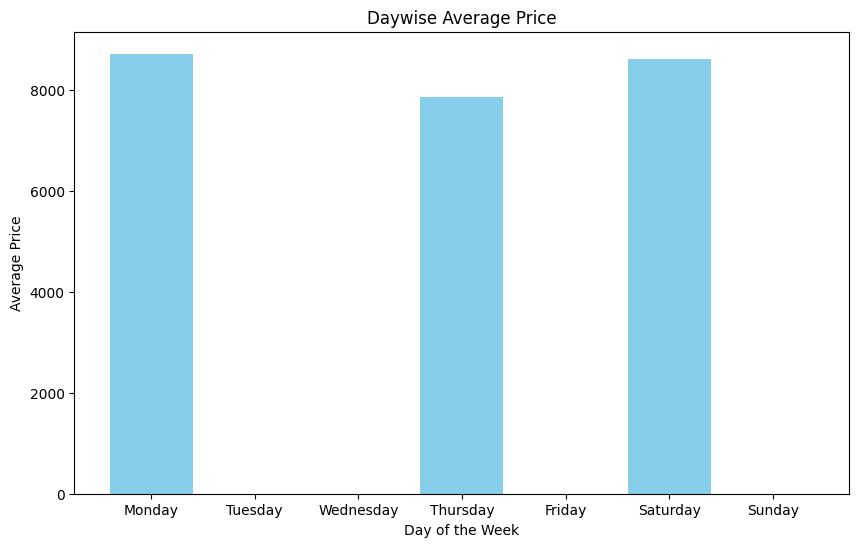

In [215]:
plot_daywise_data(avg_on_travel_date)

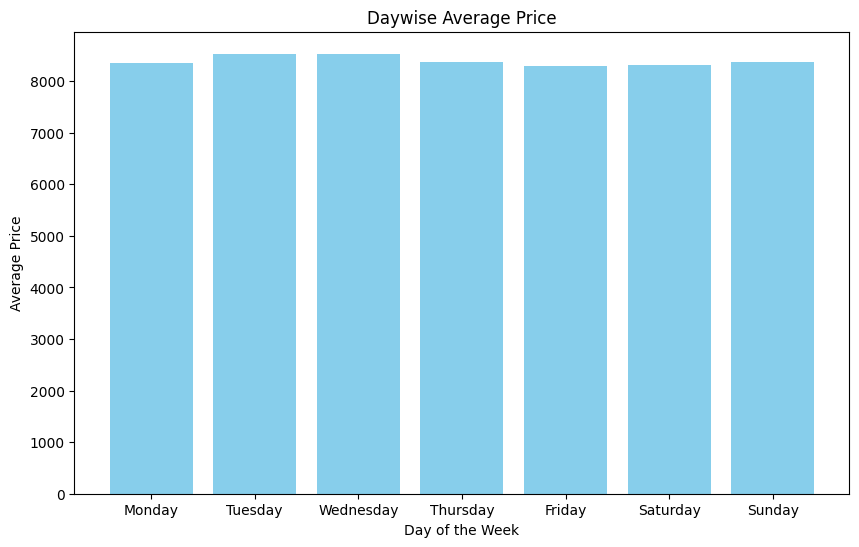

In [216]:
plot_daywise_data(avg_on_book_date)

In [217]:
from matplotlib.colors import LogNorm

def plot_booking_heatmap(data, label_step=10):
    # Extract unique booking dates and travel dates from the data
    booking_dates = sorted(set(row[2] for row in data))
    travel_dates = sorted(set(row[3] for row in data))

    # Create a dictionary to store price values by (booking_date, travel_date)
    price_dict = {(row[2], row[3]): float(row[4]) for row in data}

    # Create an empty 2D array for the heatmap with NaN values for non-existing entries
    heatmap_data = np.full((len(booking_dates), len(travel_dates)), np.nan)

    # Fill the heatmap data array with prices from price_dict
    for i, booking_date in enumerate(booking_dates):
        for j, travel_date in enumerate(travel_dates):
            if (booking_date, travel_date) in price_dict:
                heatmap_data[i, j] = price_dict[(booking_date, travel_date)]

    # Plot the heatmap using seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Price'}, 
                linewidths=0.5, linecolor='lightgray',
                vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data),
                norm=LogNorm())
    

    # Display spaced axis labels
    plt.xticks(ticks=np.arange(0, len(travel_dates), label_step), labels=travel_dates[::label_step], rotation=45)
    plt.yticks(ticks=np.arange(0, len(booking_dates), label_step), labels=booking_dates[::label_step], rotation=0)

    # Label the axes and give the plot a title
    plt.xlabel("Travel Date")
    plt.ylabel("Booking Date")
    plt.title("Price Heatmap: Booking Date vs. Travel Date")

    # Show the plot
    plt.show()

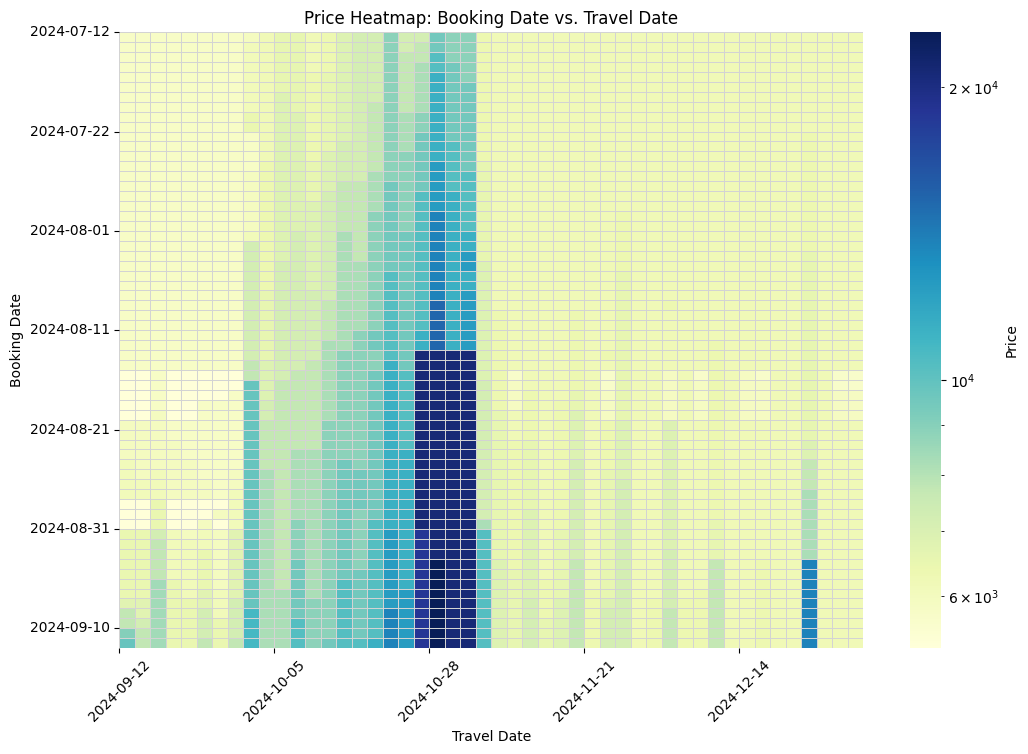

In [218]:
# sample = [
#     ["A", "B", "2024-01-01", "2024-01-05", "100"],
#     ["A", "B", "2024-01-02", "2024-01-05", "150"],
#     ["A", "B", "2024-01-01", "2024-01-06", "200"],
#     ["A", "B", "2024-01-03", "2024-01-07", "250"],
#     # Add more rows as needed
# ]
heat_data = []
cutoff_date = datetime.datetime(2024,12,31)
for row in filt_data:
    trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
    if (trav_date < cutoff_date):
        heat_data.append(row)    

plot_booking_heatmap(heat_data)

In [219]:
def calc_avg_on_travel_month(data):
    sum = [0]*12
    cnt = [0]*12
    delta = 90 
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = trav_date.month - 1
            sum[ind] += int(row[4])
            cnt[ind] += 1
    
    avg = [0]*12
    for i in range(12):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    return avg


In [220]:
def plot_monthwise_data(data):
    if len(data) != 12:
        raise ValueError("Data list must contain exactly 7 values.")

    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    plt.figure(figsize=(10, 6))
    plt.bar(months, data, color='skyblue')
    plt.xlabel("Month")
    plt.ylabel("Average Price")
    plt.title("Montthwise Average Price")
    plt.show()

No data for  0
No data for  1
No data for  2
No data for  3
No data for  4
No data for  5
No data for  6
No data for  7


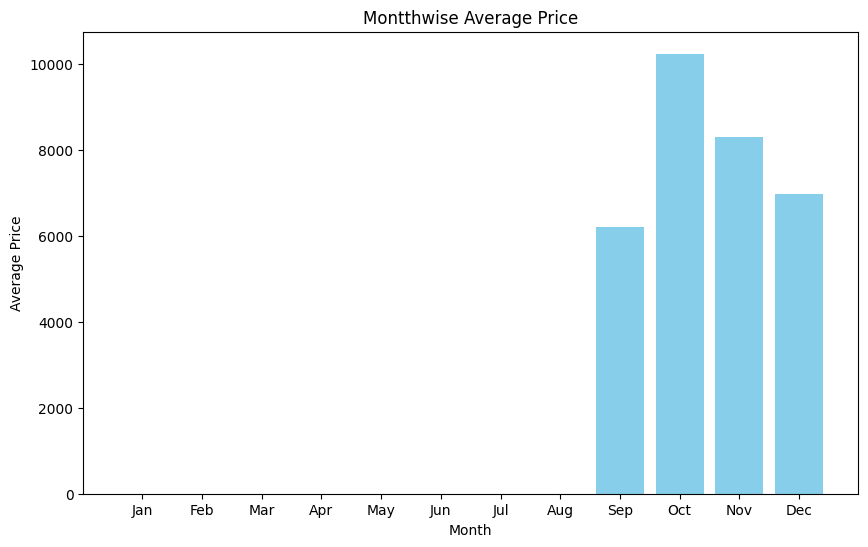

In [221]:
plot_monthwise_data(calc_avg_on_travel_month(filt_data))

No data for  0
No data for  90
No data for  91
No data for  92
No data for  93
No data for  94
Points Processed:  1581


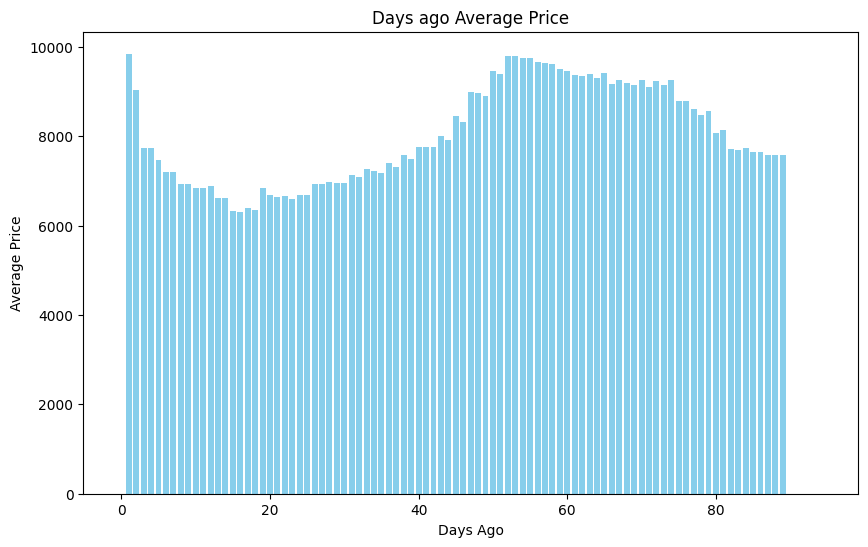

In [222]:
def calc_avg_on_days_ago(data):
    sum = [0]*95
    cnt = [0]*95
    delta = 90
    tot_cnt = 0
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = diff.days
            sum[ind] += int(row[4])
            cnt[ind] += 1
            tot_cnt += 1
    
    avg = [0]*95
    for i in range(95):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    print("Points Processed: ", tot_cnt)
    return avg

def plot_days_ago_data(data):
    # if len(data) != 12:
    #     raise ValueError("Data list must contain exactly 7 values.")

    # months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(data)), data, color='skyblue')
    plt.xlabel("Days Ago")
    plt.ylabel("Average Price")
    plt.title("Days ago Average Price")
    plt.show()

plot_days_ago_data(calc_avg_on_days_ago(filt_data))
